In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [2]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

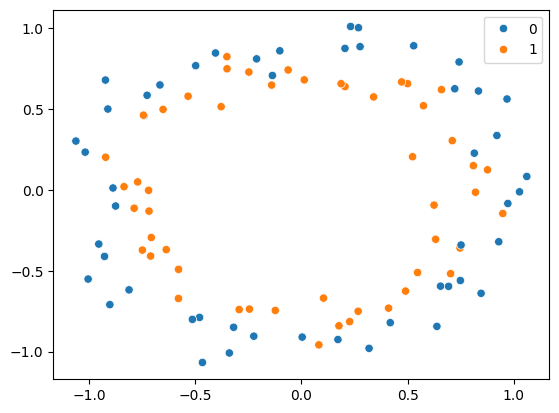

In [3]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [5]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\Jay Sunil Sonawane\anaconda3\envs\dsml_40_env1\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=320, verbose=1)    # here u can also use validation_split instead of validation_data

Epoch 1/320
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step - accuracy: 0.4344 - loss: 0.6985 - val_accuracy: 0.6000 - val_loss: 0.6834
Epoch 2/320
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.4992 - loss: 0.6929 - val_accuracy: 0.5500 - val_loss: 0.6856
Epoch 3/320
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.4422 - loss: 0.6926 - val_accuracy: 0.5500 - val_loss: 0.6888
Epoch 4/320
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5000 - loss: 0.6898 - val_accuracy: 0.6500 - val_loss: 0.6919
Epoch 5/320
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.5539 - loss: 0.6881 - val_accuracy: 0.6000 - val_loss: 0.6940
Epoch 6/320
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5562 - loss: 0.6878 - val_accuracy: 0.5500 - val_loss: 0.6959
Epoch 7/320
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5523 - loss: 0.6864 - val_accuracy: 0.4000 - val_loss: 0.6983
Epoch 8/320
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5727 - loss: 0.6830 - val_accuracy: 0.4000 - val_loss

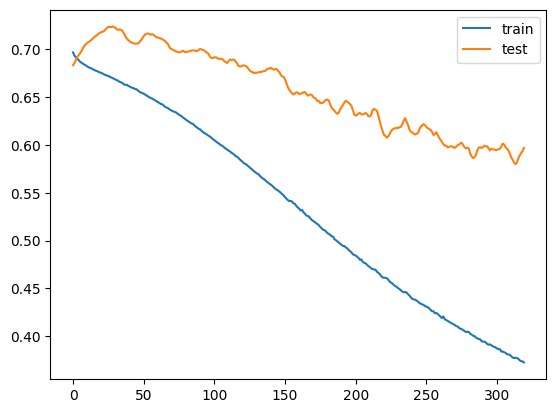

In [8]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step


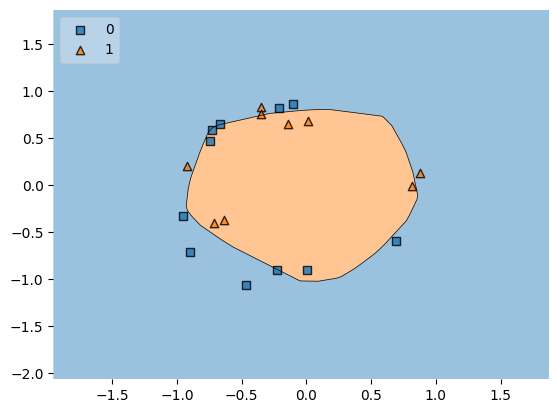

In [9]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

### Early Stopping

In [10]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [13]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=320, callbacks=callback)

Epoch 1/320
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 214ms/step - accuracy: 0.4656 - loss: 0.6949 - val_accuracy: 0.5000 - val_loss: 0.6885
Epoch 2/320
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.5156 - loss: 0.6925 - val_accuracy: 0.5000 - val_loss: 0.6924
Epoch 3/320
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.4820 - loss: 0.6914 - val_accuracy: 0.5500 - val_loss: 0.6957
Epoch 4/320
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.5180 - loss: 0.6907 - val_accuracy: 0.4500 - val_loss: 0.6991
Epoch 5/320
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5578 - loss: 0.6870 - val_accuracy: 0.4500 - val_loss: 0.7012
Epoch 6/320
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.5664 - loss: 0.6859 - val_accuracy: 0.4000 - val_loss: 0.7031
Epoch 7/320
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.5664 - loss: 0.6835 - val_accuracy: 0.4000 - val_loss: 0.7049
Epoch 8/320
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.5820 - loss: 0.6849 - val_accuracy: 0.4000 - val_loss

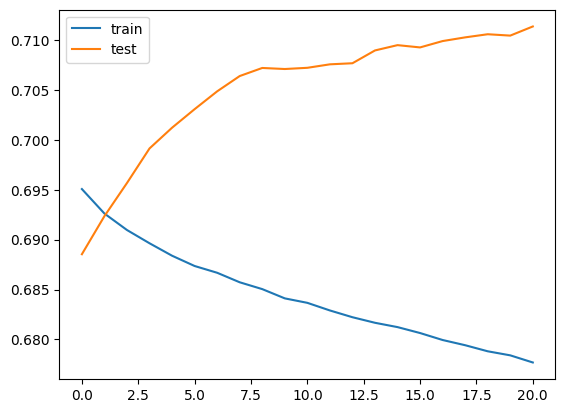

In [14]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step


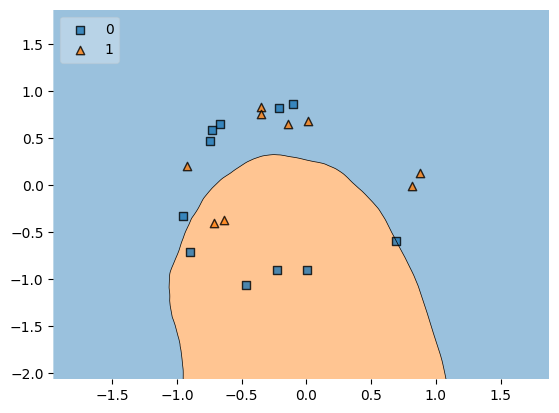

In [15]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()